In [1]:
#import required libraries
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
#get band names
bandPath = '../S2B_MSIL1C_20200917T151709_N0209_R125_T18LUM_20200917T203629.SAFE/GRANULE/L1C_T18LUM_A018455_20200917T151745/IMG_DATA/'
bandNames = os.listdir(bandPath)
bandNames

['T18LUM_20200917T151709_B01.jp2',
 'T18LUM_20200917T151709_B02.jp2',
 'T18LUM_20200917T151709_B03.jp2',
 'T18LUM_20200917T151709_B04.jp2',
 'T18LUM_20200917T151709_B05.jp2',
 'T18LUM_20200917T151709_B06.jp2',
 'T18LUM_20200917T151709_B07.jp2',
 'T18LUM_20200917T151709_B08.jp2',
 'T18LUM_20200917T151709_B09.jp2',
 'T18LUM_20200917T151709_B10.jp2',
 'T18LUM_20200917T151709_B11.jp2',
 'T18LUM_20200917T151709_B12.jp2',
 'T18LUM_20200917T151709_B8A.jp2',
 'T18LUM_20200917T151709_TCI.jp2']

In [3]:
#import area of interest as Fiona geometry
aoiFile = fiona.open('../shp/AOI.shp')
aoiGeom = [aoiFile[0]['geometry']]

In [4]:
#clip one raster B01
bandName = bandNames[0]
rasterPath = os.path.join(bandPath,bandName)
rasterBand = rasterio.open(rasterPath)
outImage, outTransform = mask(rasterBand, aoiGeom, crop=True)
outMeta = rasterBand.meta
outMeta.update({"driver": 'JP2OpenJPEG',
                 "height": outImage.shape[1],
                 "width": outImage.shape[2],
                 "transform": outTransform})
outRaster = rasterio.open("../rst/"+bandName, "w", **outMeta) 
outRaster.write(outImage)
outRaster.close()

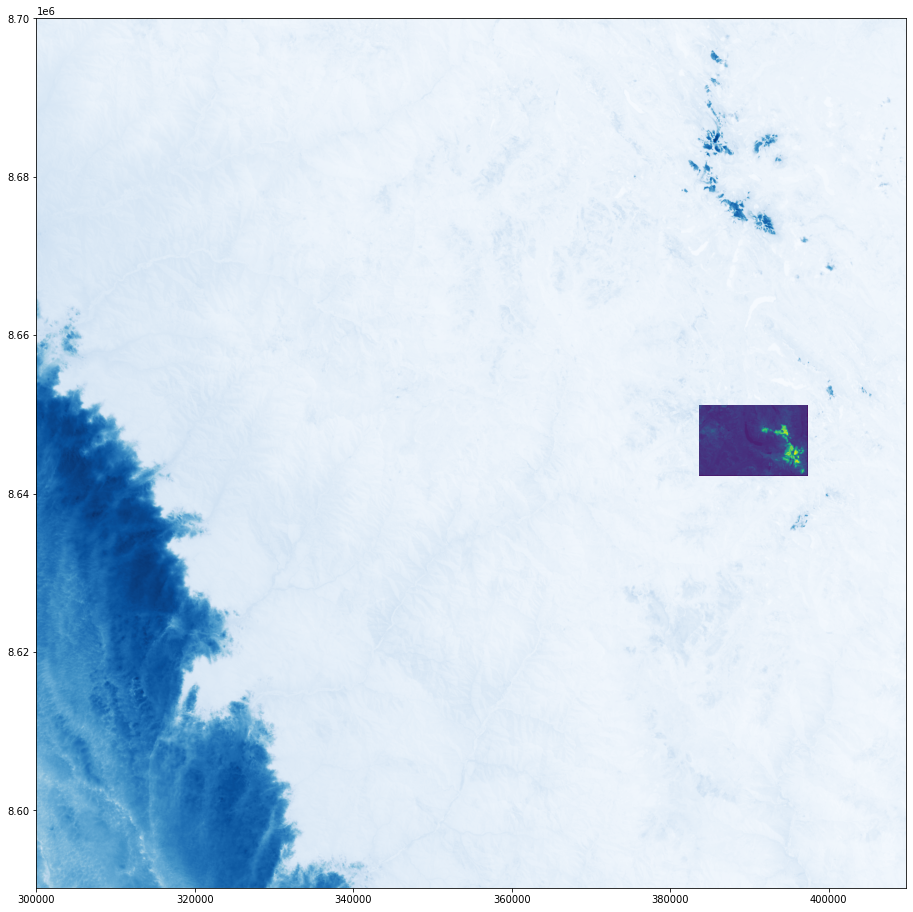

In [5]:
#plot original and clipped rasters
bandZero = rasterio.open("../rst/"+bandName,'r')
fig, ax = plt.subplots(figsize=(16,16))
show(rasterBand, cmap='Blues', ax=ax)
show(bandZero, cmap='viridis', ax=ax)
ax.set_ylim(rasterBand.bounds.bottom,rasterBand.bounds.top)
ax.set_xlim(rasterBand.bounds.left,rasterBand.bounds.right)
plt.show()
bandZero.close()

In [6]:
#clip all rasters
for band in bandNames:
    rasterPath = os.path.join(bandPath,band)
    rasterBand = rasterio.open(rasterPath)
    outImage, outTransform = mask(rasterBand, aoiGeom, crop=True)
    outMeta = rasterBand.meta
    outMeta.update({"driver": 'JP2OpenJPEG',
                 "height": outImage.shape[1],
                 "width": outImage.shape[2],
                 "transform": outTransform})
    outPath = os.path.join('../rst',band)
    outRaster = rasterio.open(outPath, "w", **outMeta) 
    outRaster.write(outImage)
    outRaster.close()